In [116]:
from sklearn.preprocessing import StandardScaler
from hmmlearn.hmm import GaussianHMM
import numpy as np
import numpy as np
from matplotlib import cm, pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [117]:
stocks=['aapl','googl','nvda','dal','xom','cvx','vz']

In [118]:
import pandas as pd
import os
init_dir_path = str(os.getcwd())  # find current working directory
stock_paths=[init_dir_path+'/stock_data/'+x+'_prices.csv' for x in stocks]

In [119]:
features=['Return','Volatility','HighR','LowR']


In [120]:
data_full=[]
for sp,sn in zip(stock_paths,stocks):
    s=pd.read_csv(sp)
    #s=s.drop(['High','Low','Volume'],axis=1)
    s['Return']=100*(s['Close']-s['Open'])/s['Open']
    s['HighR']=100*(s['High']-s['Open'])/s['Open']
    s['LowR']=100*(s['Low']-s['Open'])/s['Open']
    s['Volatility']=s['Return'].rolling(window=3).std()
    s['Date']=pd.to_datetime(s['Date'])
    s=s.iloc[3:]
    s=s.reset_index(drop=True)
    s[features]=StandardScaler().fit_transform(s[features])
    s['Ticker']=sn
    data_full.append(s)

In [129]:
data_with_date=[x[features+["Date"]] for x in data_full]
data = [x[features] for x in data_full]

In [122]:
def plot_in_sample_hidden_states(hmm_model, df, features):
    """
    Plot the adjusted closing prices masked by 
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    rets = df[features]
    hidden_states = hmm_model.predict(rets)
    #df['State']=hidden_states
    # Create the correctly formatted plot
    #sns.scatterplot(data=df,y='Close',x='Date',hue='State',palette=['red','blue'])
    fig, ax = plt.subplots()
    
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (colour) in enumerate(colours):
        mask = hidden_states == i
        ax.plot(
            df.index[mask], 
            df["Close"][mask], 
            ".", linestyle='none', 
            c=colour
        )
# Format x-axis with years
    ax.xaxis.set_major_locator(mdates.YearLocator())      # one tick per year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format tick labels as YYYY
    fig.autofmt_xdate()  # Rotate labels automatically

    ax.set_title("In-Sample Hidden States")
    ax.set_xlabel("Year")
    ax.set_ylabel("Close Price")
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

In [123]:
xdata=np.concatenate(data)
lengths=[len(x) for x in data]
model=GaussianHMM(n_components=2,n_iter=10000,tol=1e-5)
model.fit(xdata,lengths)

#plot_in_sample_hidden_states(model,split_sets[i].iloc[train],features)


GaussianHMM(n_components=2, n_iter=10000, tol=1e-05)

In [124]:
models=[]
for x in data_full:
    modl=GaussianHMM(n_components=2,n_iter=10000,tol=1e-5)
    modl.fit(x[features])
    models.append(modl)

C:\Users\18585\AppData\Local\Temp\ipykernel_12888\88172102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


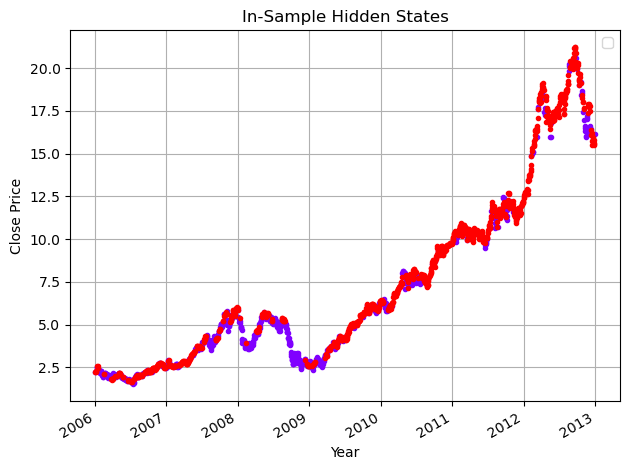

Plot for aapl


C:\Users\18585\AppData\Local\Temp\ipykernel_12888\88172102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


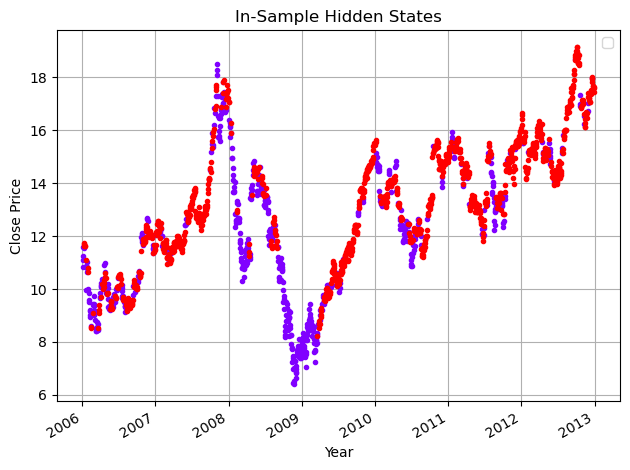

Plot for googl


C:\Users\18585\AppData\Local\Temp\ipykernel_12888\88172102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


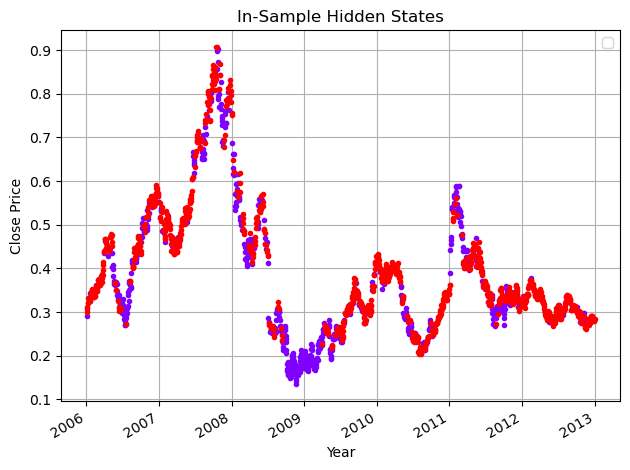

Plot for nvda


C:\Users\18585\AppData\Local\Temp\ipykernel_12888\88172102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


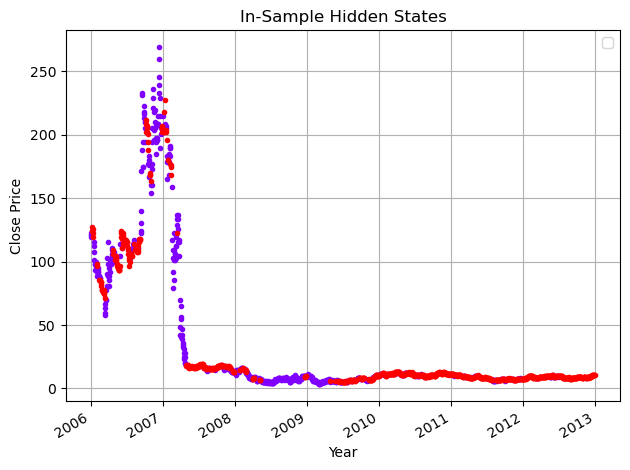

Plot for dal


C:\Users\18585\AppData\Local\Temp\ipykernel_12888\88172102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


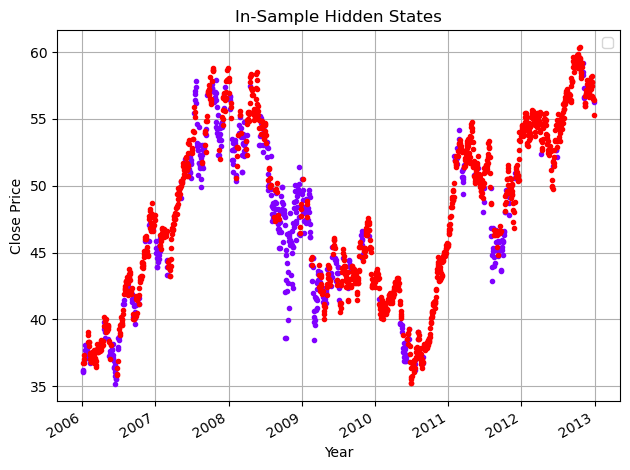

Plot for xom


C:\Users\18585\AppData\Local\Temp\ipykernel_12888\88172102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


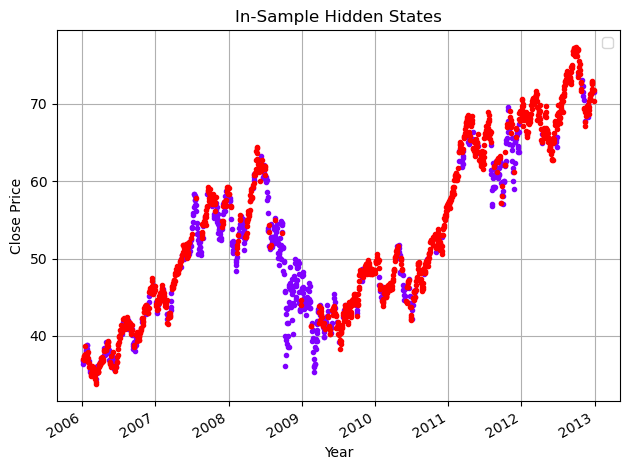

Plot for cvx


C:\Users\18585\AppData\Local\Temp\ipykernel_12888\88172102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


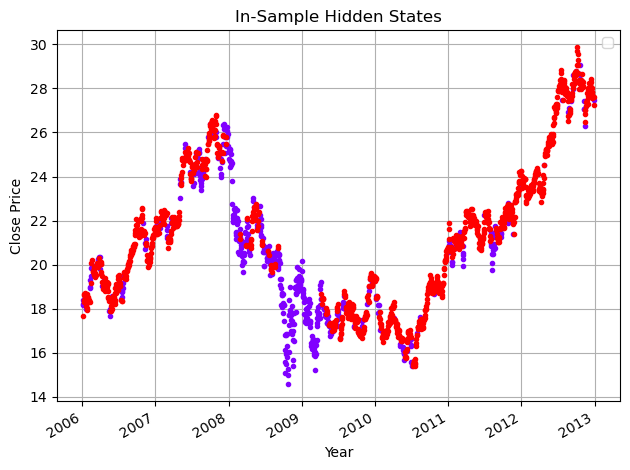

Plot for vz


In [125]:
for i in range(len(stocks)):
    stock = data_full[i]
    df= stock[stock["Date"].dt.year.isin(range(2006,2013))].reset_index(drop=True)
    df.set_index('Date', inplace=True)
    plot_in_sample_hidden_states(model,df,features)
    print(f"Plot for {stocks[i]}")

In [130]:
l=[]
for (i,x) in enumerate(data_with_date):
    x['State']=pd.Series(model.predict(x[features]))
    a=x[x['State']==0]['Return'].sum()
    b=x[x['State']==1]['Return'].sum()
    l.append((a,b))
    if a > b:
        x['State']=1-x['State']
    x['Ticker']=stocks[i]


C:\Users\18585\AppData\Local\Temp\ipykernel_12888\2084324624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['State']=pd.Series(model.predict(x[features]))
C:\Users\18585\AppData\Local\Temp\ipykernel_12888\2084324624.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Ticker']=stocks[i]
C:\Users\18585\AppData\Local\Temp\ipykernel_12888\2084324624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [131]:
#State 0 is bear, State 1 is bullish
#checking consistency
l

[(np.float64(-80.03524131626719), np.float64(80.03524131626727)),
 (np.float64(-83.96168460127643), np.float64(83.9616846012765)),
 (np.float64(-123.44900423484452), np.float64(123.44900423484451)),
 (np.float64(-117.94467121530195), np.float64(117.94467121530198)),
 (np.float64(-51.15986249985575), np.float64(51.15986249985566)),
 (np.float64(-90.7326412451636), np.float64(90.73264124516368)),
 (np.float64(-73.1712309519906), np.float64(73.1712309519906))]

In [133]:
total=pd.concat(data_with_date).reset_index(drop=True)
total.to_csv('stock_hmm_output.csv')